In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
import pandas as pd
import glob
import sipm.util.functions as func
from datetime import datetime
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
!pwd

/home/as111/sipm-analysis


In [3]:
# data folder
path = "/scratch/gpfs/as111/results/2023-12-13"
data_spe = {}
channels = np.arange(8)
volt = 98
for ch in channels:
    data_spe[ch] = {'n_spe_wfs':0, 'avg_spe_wf':np.zeros(0), 'time':np.zeros(0)}
    files = glob.glob(f"{path}/*volt_{volt}*laser_waveform_liq5.h5")
    print(files)
    for f in files:
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_spe[ch]['n_spe_wfs'] += np.array(df['n_spe_wfs'])[0]
        if data_spe[ch]['time'].shape[0]==0:
            data_spe[ch]['time'] = np.array(df['time'])
        if np.array(df['n_spe_wfs'])[0]>0:
            if data_spe[ch]['avg_spe_wf'].shape[0]==0:
                data_spe[ch]['avg_spe_wf'] = np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
            else:
                data_spe[ch]['avg_spe_wf'] += np.array(df['avg_spe_wf'])*np.array(df['n_spe_wfs'])[0]
    df = None
    if data_spe[ch]['n_spe_wfs']>0:
        data_spe[ch]['avg_spe_wf'] /= data_spe[ch]['n_spe_wfs']

['/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run0_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run5_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run3_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run4_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run8_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run2_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run9_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run6_laser_waveform_liq5.h5', '/scratch/gpfs/as111/results/2023-12-13/2023-12-13_volt_98_light_laser_cond_ar_run1_laser_waveform_liq5.h5', '/scratch/gpfs/as1

ch0 98V 52299 waveforms selected
ch1 98V 81432 waveforms selected
ch2 98V 71748 waveforms selected
ch3 98V 93174 waveforms selected
ch4 98V 97203 waveforms selected
ch5 98V 80366 waveforms selected
ch6 98V 35761 waveforms selected
ch7 98V 30428 waveforms selected


Text(0.07, 0.5, 'Amplitude (ADC Unit)')

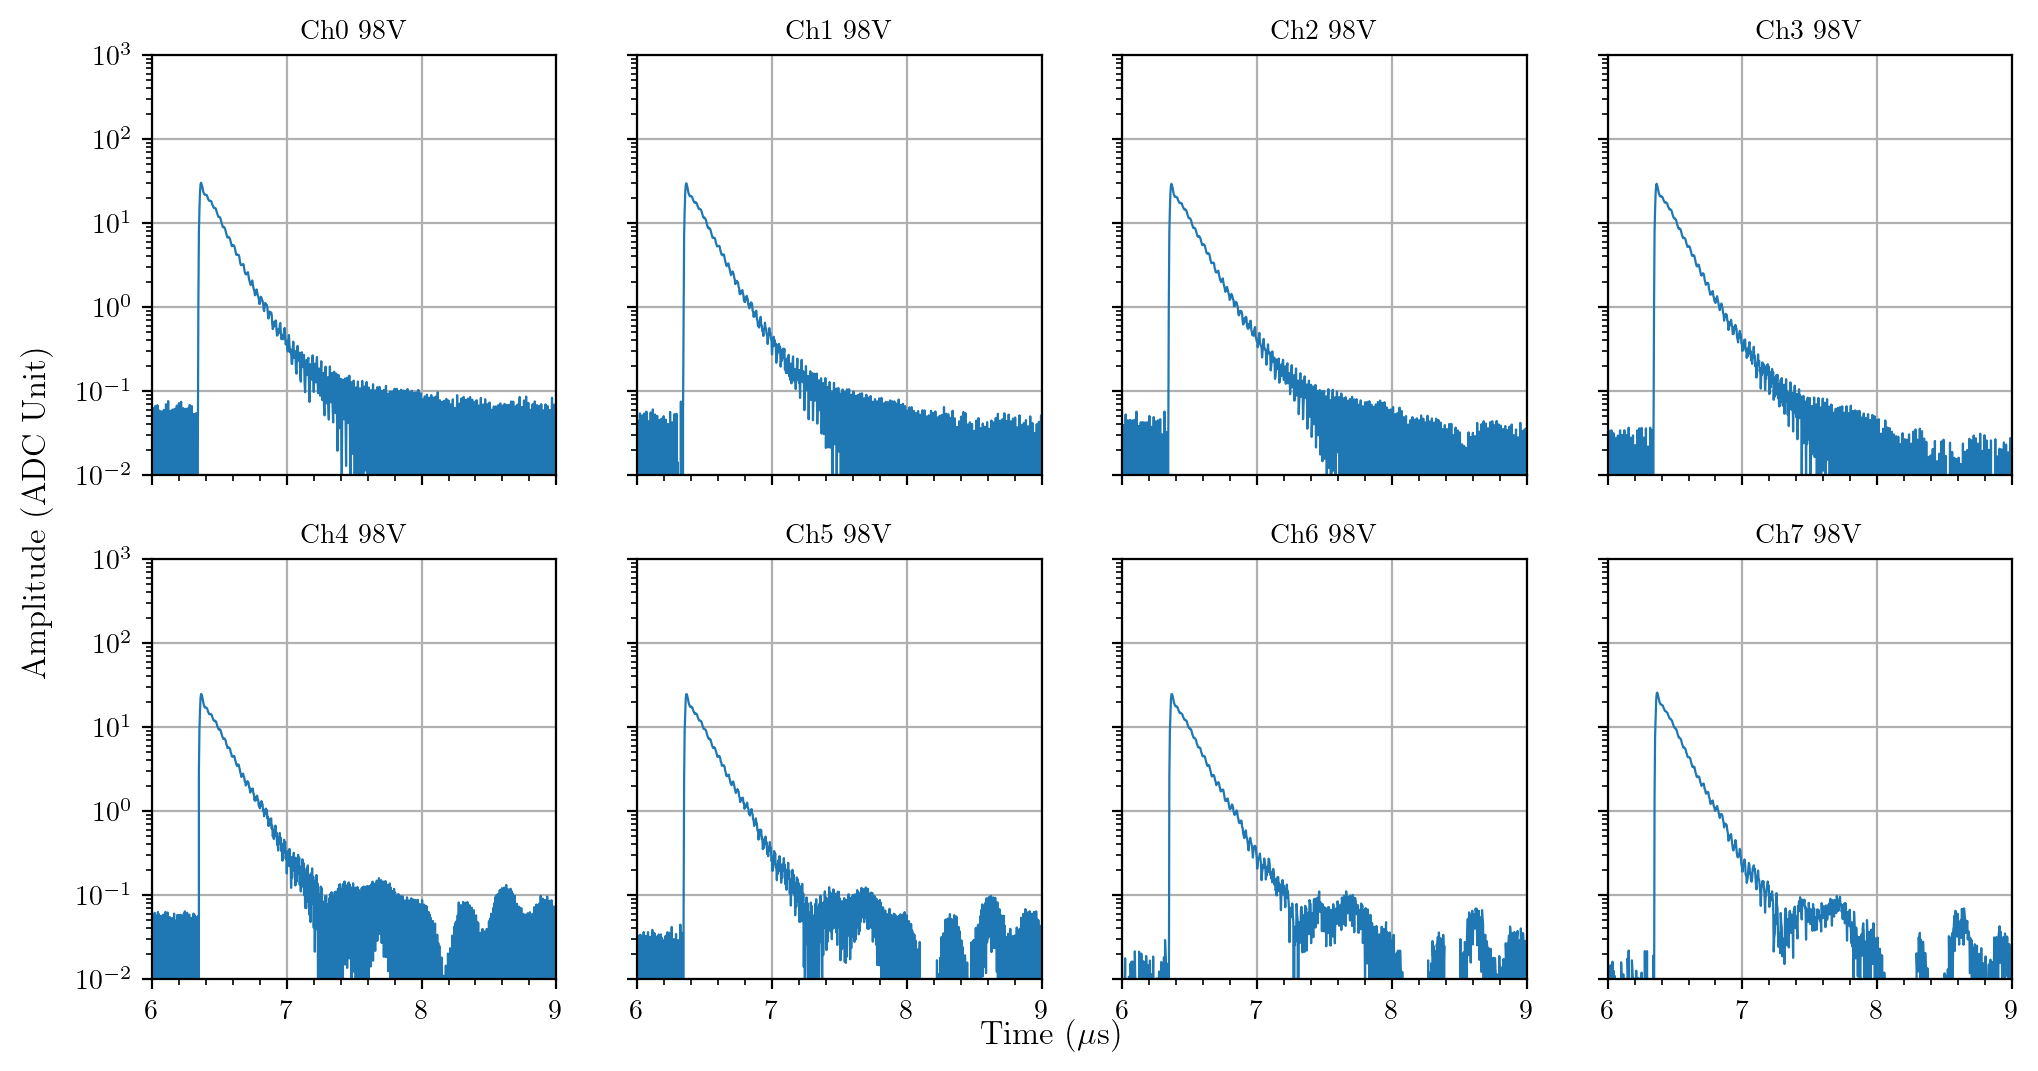

In [4]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    if data_spe[ch]['n_spe_wfs']>0:
        print(f'ch{ch} {volt}V {data_spe[ch]["n_spe_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_spe[ch]['time'],
            data_spe[ch]['avg_spe_wf'],linewidth=0.8)
    axs[j//4, j%4].set_xlim(6, 9)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch} {volt}V')
fig.supxlabel(r'Time ($\mu$s)', y=0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## FFT

Text(0.07, 0.5, 'FFT Abs. Amplitude (ADC Unit)')

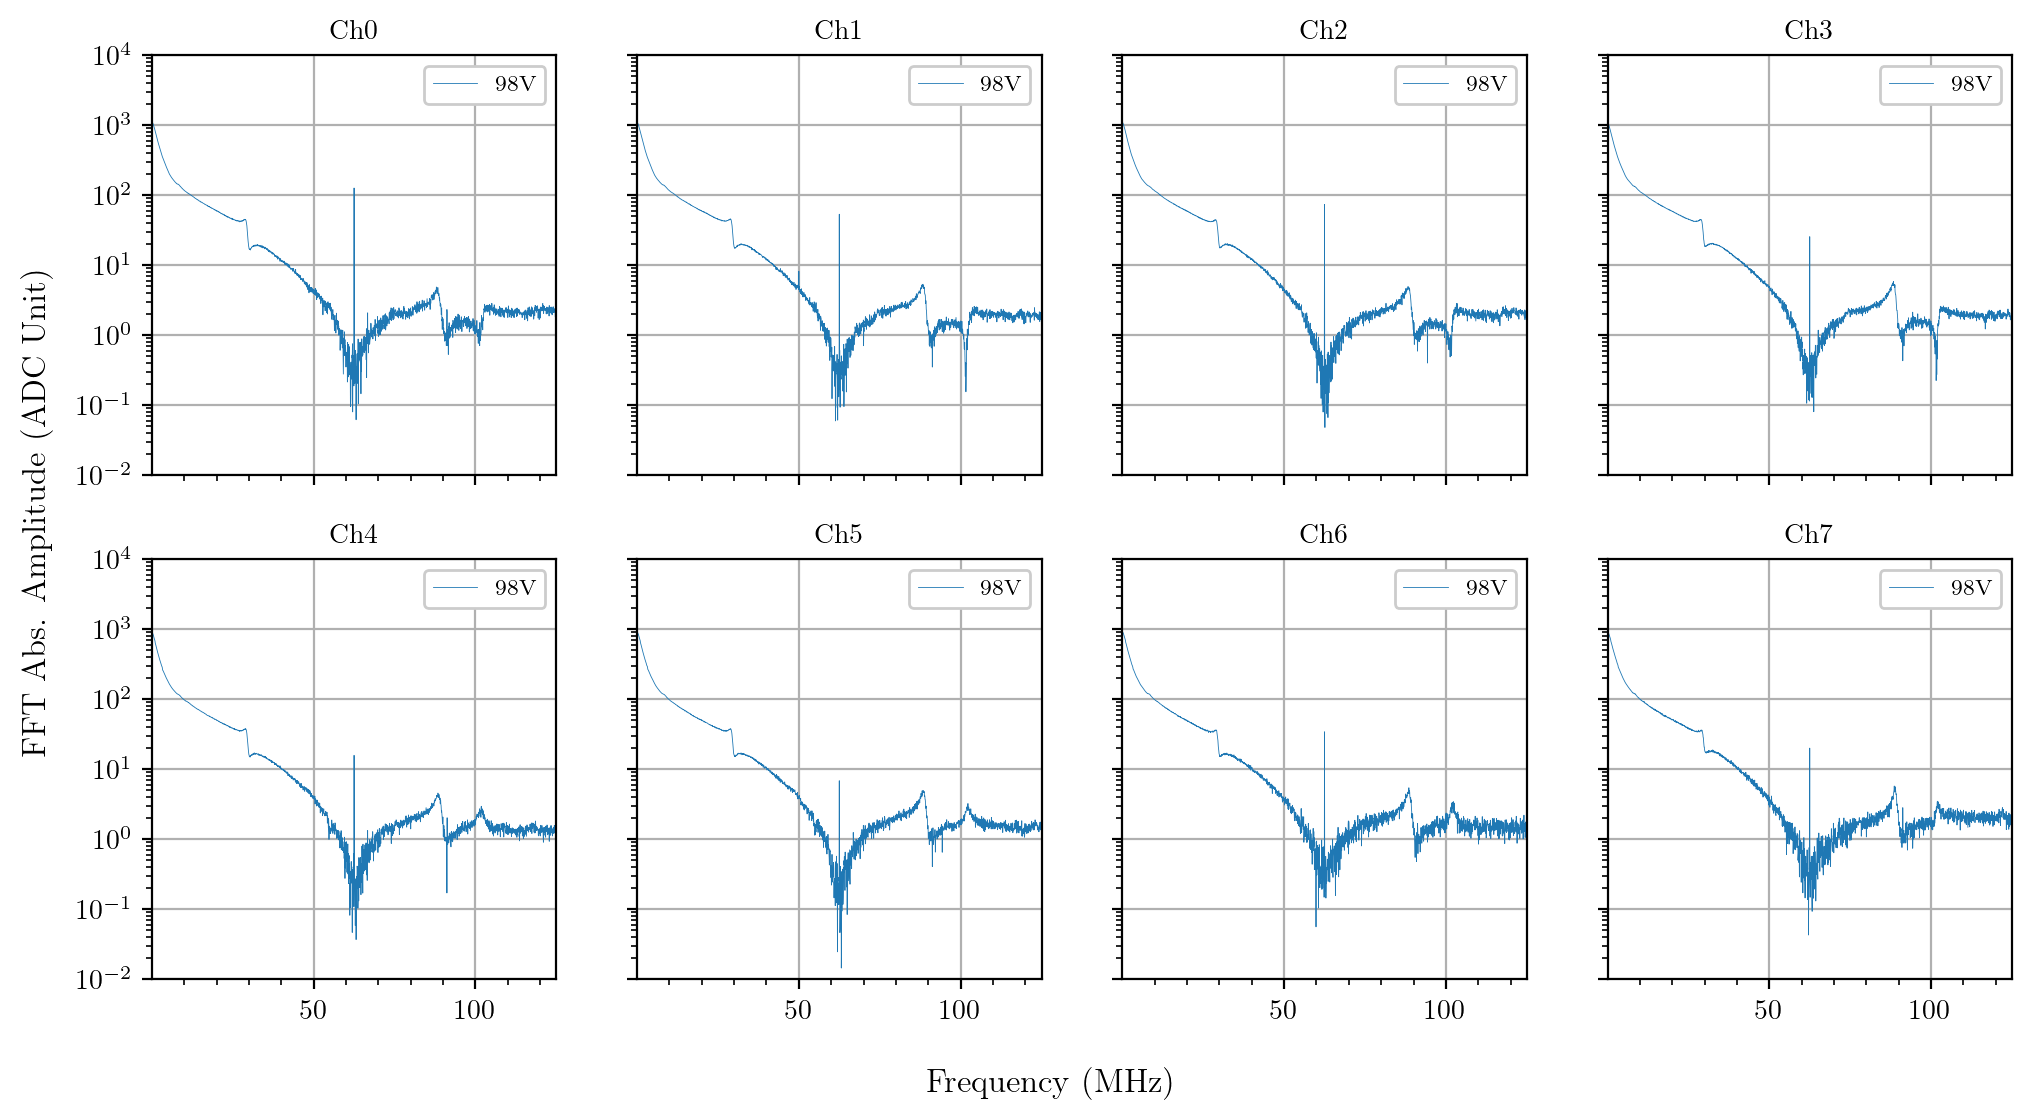

In [5]:
# Make plots for all datasets
# SPE average waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    data_spe[ch]['fft_spe_wf'] = fft(data_spe[ch]['avg_spe_wf'])
    dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
    t_total = dt+data_spe[ch]['time'][-1]
    n_over_2 = int(data_spe[ch]['time'].shape[0]/2)
    data_spe[ch]['frequency'] = data_spe[ch]['time']/dt/t_total
    axs[j//4, j%4].plot(
        data_spe[ch]['frequency'][:n_over_2],
        abs(data_spe[ch]['fft_spe_wf'][:n_over_2]),
        label=f'{volt}V', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right')
    axs[j//4, j%4].set_xlim(data_spe[ch]['frequency'][1], data_spe[ch]['frequency'][n_over_2])
    axs[j//4, j%4].set_ylim(1e-2, 1e4)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Frequency (MHz)', y=0.01)
fig.supylabel(r'FFT Abs. Amplitude (ADC Unit)', x=0.07)

# Fit: exponential pulses with time jitter
Scintillation pulse (one component):
$$h(t,t') = A e^{-\frac{t-t'}{\tau}} \Theta(t-t')$$
Time jitter:
$$g(t') = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(t'-t_0)^2}{2\sigma^2}}$$
Average waveform:
$$
f(t,t') = \int g(t') h(t,t') \, dt'
= \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{(t'-t_0)^2}{2\sigma^2}-\frac{t-t'}{\tau}} \, dt'$$

$$ = \frac{A}{\sigma\sqrt{2\pi}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t^{'2} - 2t'(t_0 + \sigma^2/\tau) + t_0^2 + 2\sigma^2 t_0/\tau + \sigma^4 /\tau^2 + 2\sigma^2 (t-t_0)/\tau - \sigma^4/\tau^2]} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sigma\sqrt{2\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t} e^{-\frac{1}{2\sigma^2}[t'-(t_0 + \sigma^2/\tau)]^2} \, dt'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{\sqrt{\pi}} e^{-\frac{t-t_0}{\tau}} \int_{-\infty}^{t/\sigma\sqrt{2}} e^{-[x'-\frac{t_0 + \sigma^2/\tau}{\sigma\sqrt{2}}]^2} \, dx'
$$

$$
= \frac{Ae^{\frac{\sigma^2}{2\tau^2}}}{2} e^{-\frac{t-t_0}{\tau}} \left[1 + erf\left(\frac{t-t_0-\sigma^2/\tau}{\sigma\sqrt{2}}\right)\right]
$$
We include two scintillation pulse components with distinct $\tau$.

In [6]:
def template(t, a_1, tau_1, sigma, t0):
        return func.pulse_jitter(t, a_1, tau_1, sigma, t0)

In [7]:
# Fit SPE average waveform
for j, ch in enumerate(channels):
    pretrg = 5 #us
    err = np.std(data_spe[ch]['avg_spe_wf'][data_spe[ch]['time']<pretrg])
    fit_range = [6.2,7.5] #us
    range_arr = (data_spe[ch]['time']<fit_range[1])&(data_spe[ch]['time']>fit_range[0])
    # print(pos,ch,volt)
    # print(data_spe[pos][ch][volt]['time'][range_arr])
    # print(data_spe[pos][ch][volt]['avg_spe_wf'][range_arr])
    popt,pcov = curve_fit(
        template,
        data_spe[ch]['time'][range_arr], 
        data_spe[ch]['avg_spe_wf'][range_arr], 
        p0=[20, 0.15, 0.005, 6.35], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    data_spe[ch]['pars'] = popt
    data_spe[ch]['cov'] = pcov
    print(popt)

[3.09978444e+01 1.44186287e-01 4.98543328e-03 6.35198728e+00]
[2.98576818e+01 1.45897283e-01 4.78143251e-03 6.35198606e+00]
[2.91092843e+01 1.49812852e-01 4.69644096e-03 6.35153502e+00]
[2.95886277e+01 1.45414900e-01 4.76844381e-03 6.35163753e+00]
[2.44756170e+01 1.46659801e-01 4.63745825e-03 6.35366751e+00]
[2.48016769e+01 1.45701012e-01 4.71951053e-03 6.35401420e+00]
[2.51048752e+01 1.45447319e-01 4.83536352e-03 6.35419334e+00]
[2.63450992e+01 1.39803756e-01 4.89159142e-03 6.35524434e+00]


# Triplet lifetime
Here the average waveforms are deconvolved channel-by-channel using their respective SPE pulse shapes.
The deconvolved waveform is given by
$$f_{deconv}(t) = \mathcal{F}^{-1}\left(\frac{\mathcal{F}(f_{original}(t))}{\mathcal{F}(f_{SiPM}(t))}\right)$$
Note that the SiPM pulse shape has to be shifted such that the trigger for it is at $t=0$.<br>

The average waveforms are selected from the events with $0.1<F_{\rm prompt}<0.5$ and $20<N_{\rm PE}<200$ ($100<N_{\rm PE}<1000$) for the top (bottom), corresponding to an energy range of $100$ keV $\lesssim E \lesssim 1000$ keV

In [8]:
# path = "/scratch/gpfs/as111/results/"
# dates = ['2024-02-16','2024-02-19','2024-02-21','2024-02-22','2024-02-23']
# files = []
# for d in dates:
#     files.extend(glob.glob(f"{path}{d}/*scintillation_waveform_liq6.h5"))
# print(files)
# print(len(files))
path = "/scratch/gpfs/as111/results/"
dates = ['2024-02-28']
files = []
for d in dates:
    files.extend(glob.glob(f"{path}{d}/*xenon_1*scintillation_waveform_liq6.h5"))
print(files)
print(len(files))

['/scratch/gpfs/as111/results/2024-02-28/2024-02-28_volt_98_light_scintillation_cond_monitor_source_co60_xenon_1_run1_scintillation_waveform_liq6.h5', '/scratch/gpfs/as111/results/2024-02-28/2024-02-28_volt_98_light_scintillation_cond_monitor_source_co60_xenon_1_run0_scintillation_waveform_liq6.h5']
2


In [9]:
# data folder
data_scint = {}
date_time = {}
channels = np.arange(8)
volt = 98
for f in files:
    data_scint[f] = {}
    df = pd.read_hdf(f, key=f'{volt}/-1')
    date_time[f] = datetime(*np.array(df['start_datetime'][:6]).astype(int))
    for ch in channels:
        data_scint[f][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
        df = pd.read_hdf(f, key=f'{volt}/{ch}')
        data_scint[f][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
        if data_scint[f][ch]['time'].shape[0]==0:
            data_scint[f][ch]['time'] = np.array(df['time'].dropna())
        if data_scint[f][ch]['avg_scint_wf'].shape[0]==0:
            data_scint[f][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
        else:
            data_scint[f][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
        df = None
        data_scint[f][ch]['avg_scint_wf'] /= data_scint[f][ch]['n_scint_wfs']
# sort according to date time
args = np.array(list(date_time.values())).argsort()
files = np.array(files)[args]

2024-02-28 16:45:24 ch0 4297 waveforms selected
2024-02-28 19:48:05 ch0 4218 waveforms selected
2024-02-28 16:45:24 ch1 4297 waveforms selected
2024-02-28 19:48:05 ch1 4218 waveforms selected
2024-02-28 16:45:24 ch2 4297 waveforms selected
2024-02-28 19:48:05 ch2 4218 waveforms selected
2024-02-28 16:45:24 ch3 4297 waveforms selected
2024-02-28 19:48:05 ch3 4218 waveforms selected
2024-02-28 16:45:24 ch4 4297 waveforms selected
2024-02-28 19:48:05 ch4 4218 waveforms selected
2024-02-28 16:45:24 ch5 4297 waveforms selected
2024-02-28 19:48:05 ch5 4218 waveforms selected
2024-02-28 16:45:24 ch6 4297 waveforms selected
2024-02-28 19:48:05 ch6 4218 waveforms selected
2024-02-28 16:45:24 ch7 4297 waveforms selected
2024-02-28 19:48:05 ch7 4218 waveforms selected


Text(0.07, 0.5, 'Amplitude (ADC Unit)')

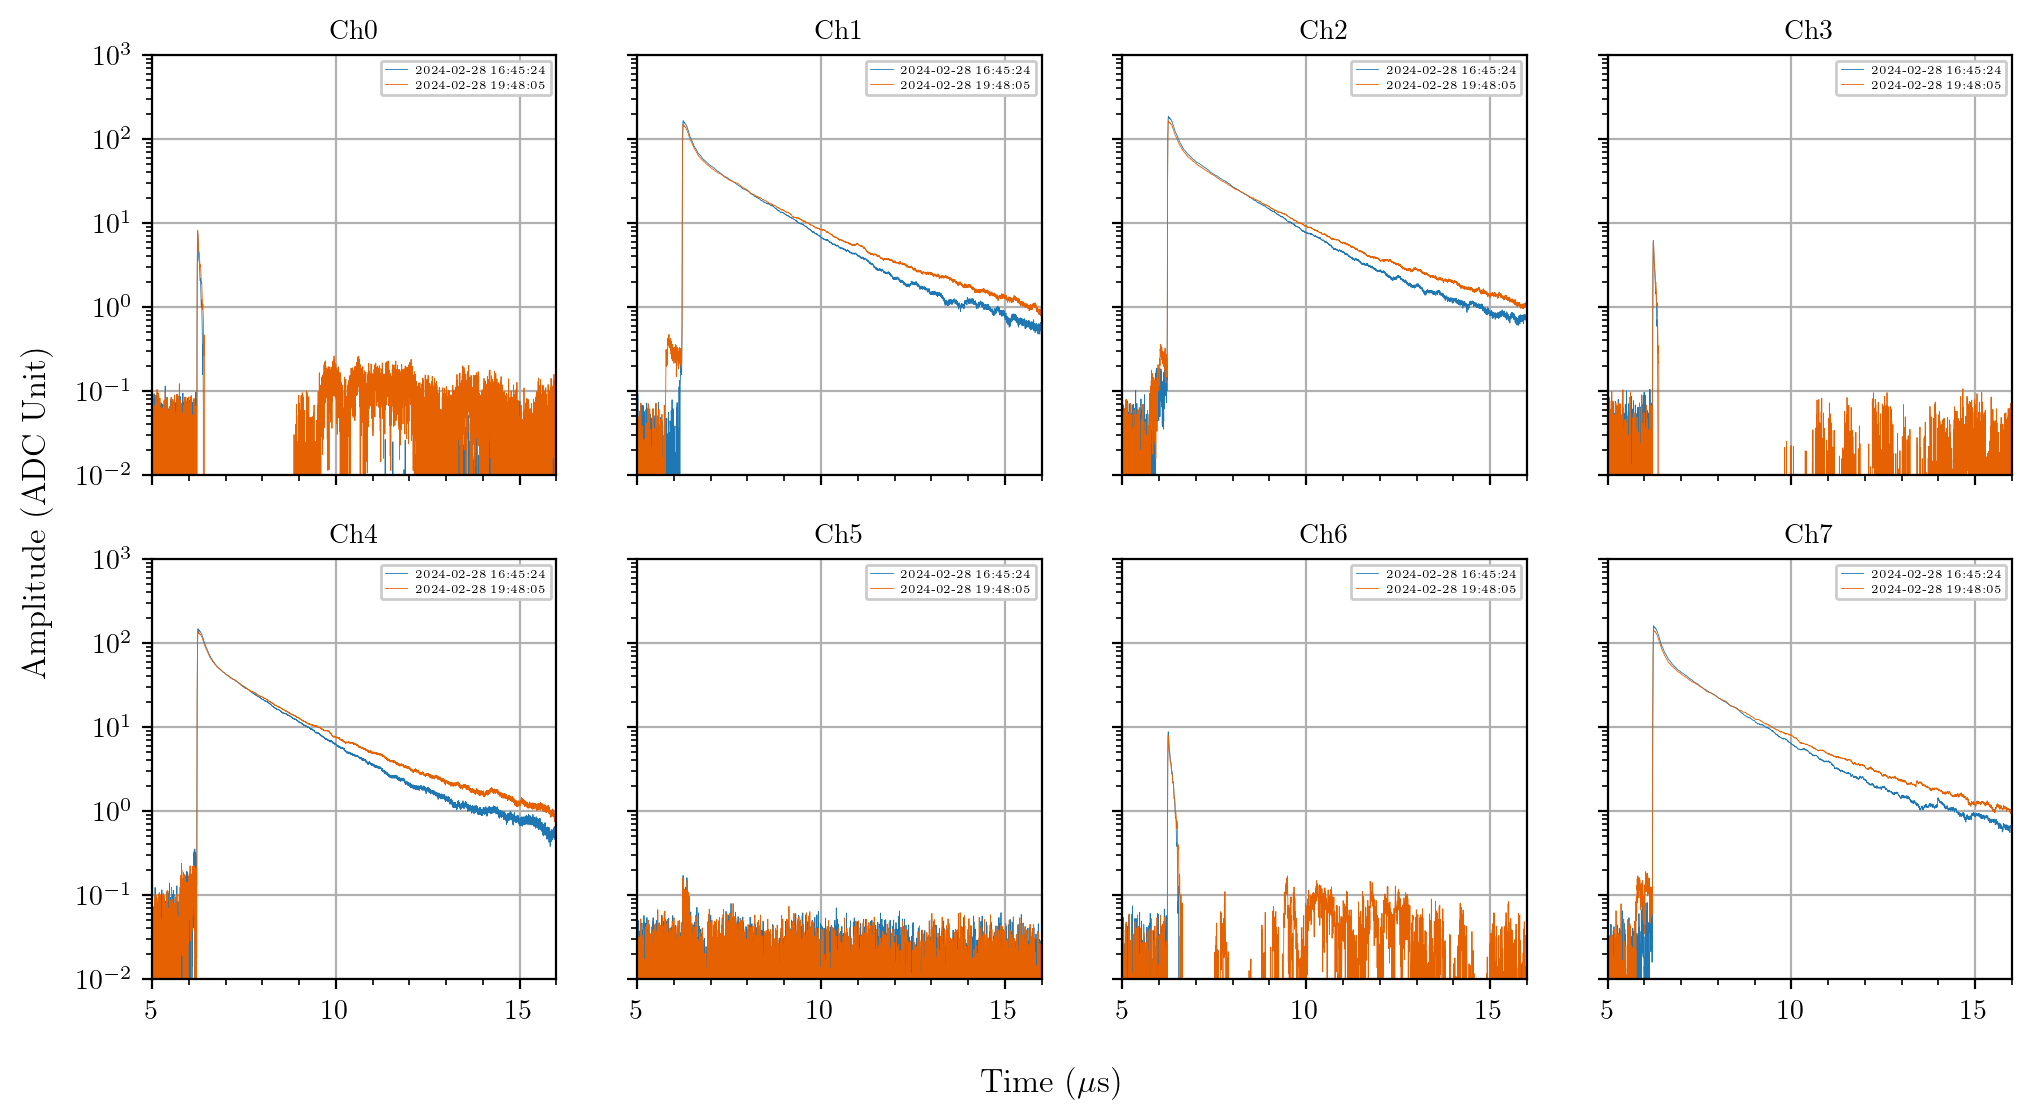

In [10]:
# Make plots for all datasets
# Average LAr scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        print(f'{date_time[f]} ch{ch} {data_scint[f][ch]["n_scint_wfs"]:.0f} waveforms selected')
        axs[j//4, j%4].plot(
            data_scint[f][ch]['time'],
            data_scint[f][ch]['avg_scint_wf'],
            label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right',fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-2, 1e3)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Deconvolution

In [11]:
# Deconvolution channel by channel
ch_old = [0,5,6,3,4,1,2,7]
for i, f in enumerate(files):
    for j, ch in enumerate(channels):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch_old[ch]]['n_spe_wfs']>0:
            dt = data_spe[ch_old[ch]]['time'][1]-data_spe[ch_old[ch]]['time'][0]
            shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch_old[ch]]['pars'][3]/dt))) for freq in data_spe[ch_old[ch]]['frequency']])
            data_scint[f][ch]['deconv'] = ifft(fft(data_scint[f][ch]['avg_scint_wf'])/data_spe[ch_old[ch]]['fft_spe_wf']*shift).real

Text(0.07, 0.5, 'Amplitude (ADC Unit)')

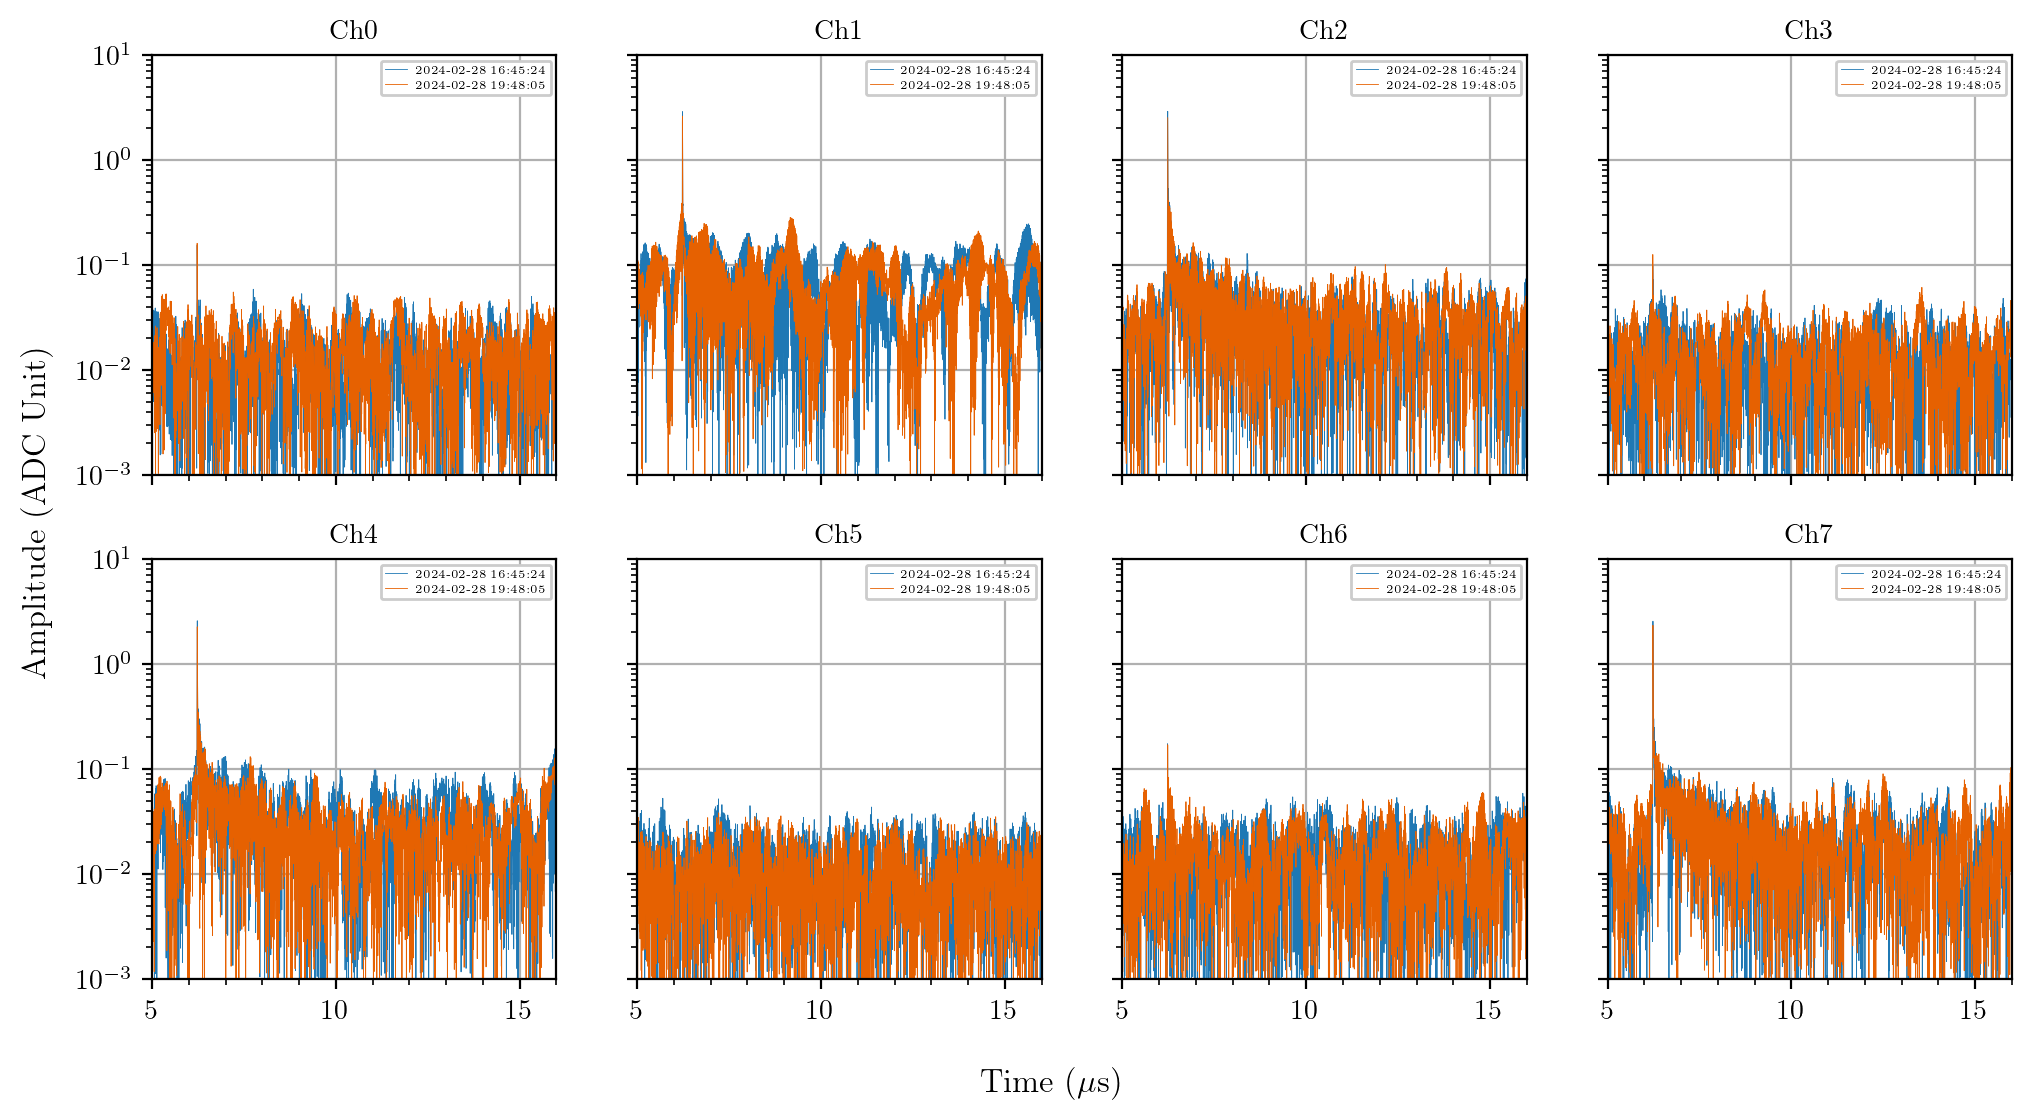

In [12]:
# Make plots for all datasets
# Deconvolved scintillation waveform
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 6)
for j, ch in enumerate(channels):
    for k, f in enumerate(files):
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            axs[j//4, j%4].plot(
                data_scint[f][ch]['time'],
                abs(data_scint[f][ch]['deconv']),
                label=f'{date_time[f]}', color=f'C{k}', linewidth=0.3)
    axs[j//4, j%4].legend(loc='upper right', fontsize=4)
    axs[j//4, j%4].set_xlim(5, 16)
    axs[j//4, j%4].set_ylim(1e-3, 1e1)
    axs[j//4, j%4].set_yscale('log')
    axs[j//4, j%4].minorticks_on()
    axs[j//4, j%4].grid()
    axs[j//4, j%4].set_title(f'Ch{ch}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.07)

## Summation + Subsampling

In [13]:
def subsample(input_t,input_wf,nsub):
    ntot = int(input_t.shape[0]//nsub * nsub)
    new_t, new_wf = np.zeros(ntot//nsub), np.zeros(ntot//nsub)
    for i in range(nsub):
        new_t += input_t[i:ntot:nsub]
        new_wf += input_wf[i:ntot:nsub]
    new_t /= nsub
    new_wf /= nsub
    return new_t, new_wf

In [14]:
# summation
for f in files:
    data_scint[f][-1] = {'time': data_scint[f][0]['time'], 'sum_wf': np.zeros(data_scint[f][0]['time'].shape[0])}
    for ch in [1,2,4,7]:    #ch1,2,4,7 without fused silica window
        if data_scint[f][ch]['n_scint_wfs']>0 and data_spe[ch]['n_spe_wfs']>0:
            data_scint[f][-1]['sum_wf'] += data_scint[f][ch]['deconv']

In [15]:
# subsampling
nsub = 4
for f in files:
    data_scint[f][-1]['time_sub'], data_scint[f][-1]['sum_wf_sub'] = subsample(data_scint[f][-1]['time'],data_scint[f][-1]['sum_wf'],nsub)

Text(0.02, 0.5, 'Amplitude (ADC Unit)')

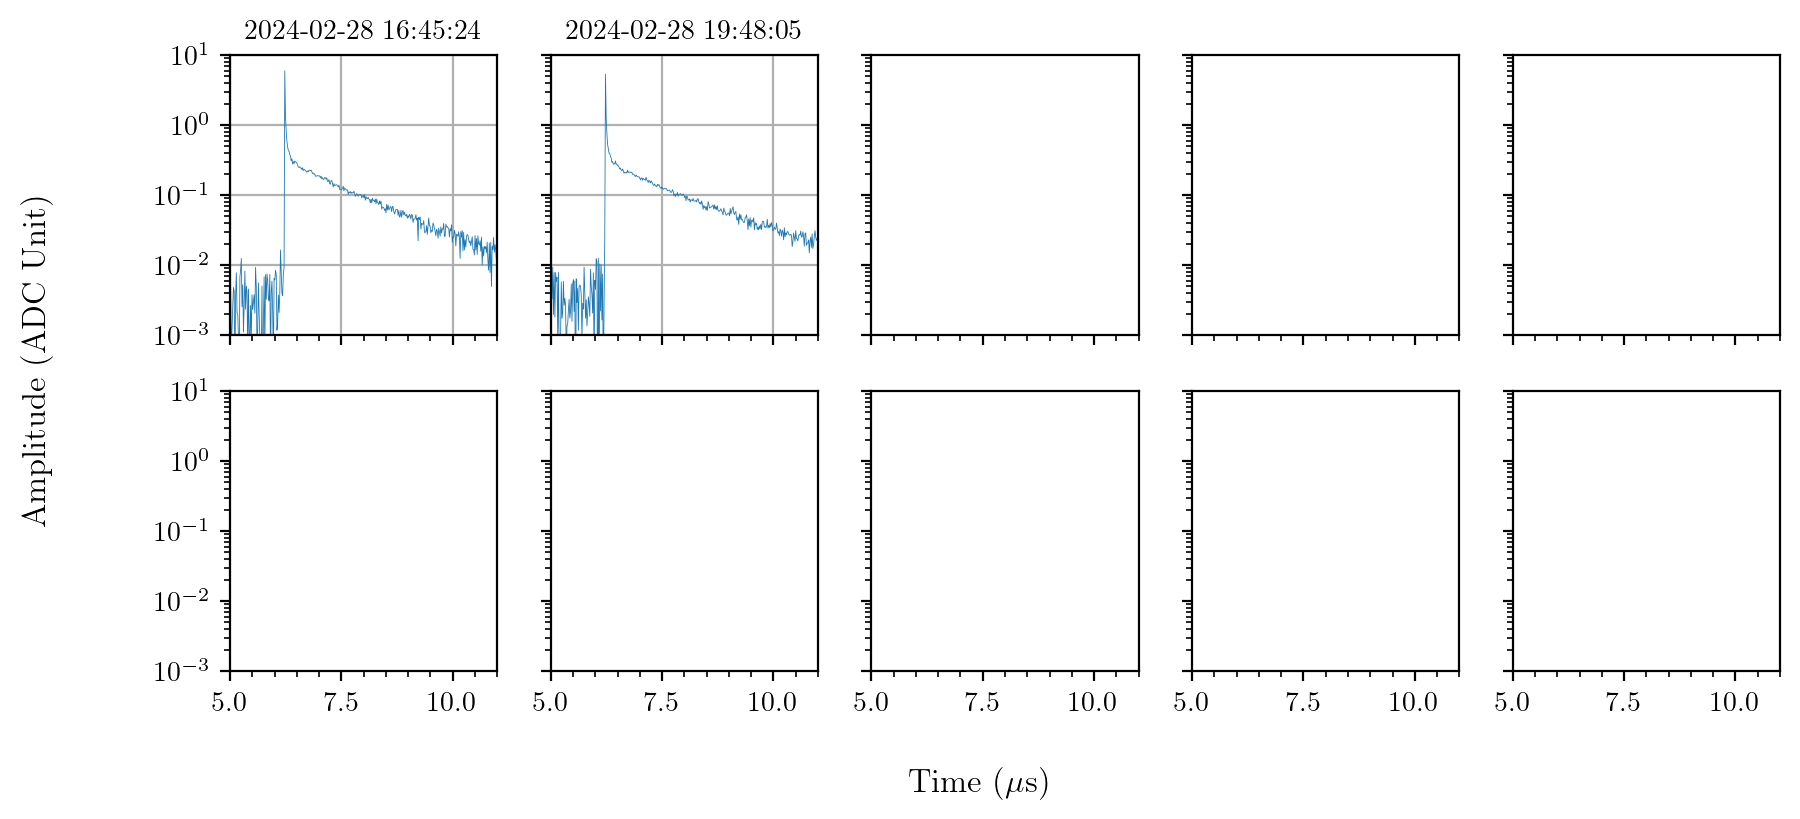

In [19]:
# Make plots for all datasets
# Summed scintillation waveform
nrows = 2
fig, axs = plt.subplots(nrows, 5, sharex=True, sharey=True)
fig.set_size_inches(10, 2*nrows)
for i, f in enumerate(files):
    axs[i//5, i%5].plot(
                data_scint[f][-1]['time_sub'],
                abs(data_scint[f][-1]['sum_wf_sub']),
                linewidth=0.3)
    axs[i//5, i%5].set_xlim(5, 11)
    axs[i//5, i%5].set_ylim(1e-3, 1e1)
    axs[i//5, i%5].set_yscale('log')
    axs[i//5, i%5].minorticks_on()
    axs[i//5, i%5].grid()
    axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=-0.05)
fig.supylabel(r'Amplitude (ADC Unit)', x=0.02)

## Fitting

In [17]:
# def template2(t, a_1, tau_1, a_2, tau_2, sigma, t0):
#         return func.pulse_jitter(t, a_1, tau_1, sigma, t0) + func.pulse_jitter(t, a_2, tau_2, sigma, t0)

In [20]:
def template3(t,a,tau):
    return a*np.exp(-t/tau)

In [21]:
# Fit SPE average waveform
nsub = 4
data_sub = {}
for f in files:
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        pretrg = 5 #us
        # fit_range = [6.2, 10] #us
        fit_range = [6.5, 10] #us
        err = np.std(data_scint[f][-1]['sum_wf_sub'][data_scint[f][-1]['time_sub']<pretrg])
        range_arr = (data_scint[f][-1]['time_sub']<fit_range[1]) & (data_scint[f][-1]['time_sub']>fit_range[0])
        # popt,pcov = curve_fit(
        #     template2,
        #     data_scint[f][-1]['time_sub'][range_arr], 
        #     data_scint[f][-1]['sum_wf_sub'][range_arr], 
        #     p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        # data_scint[f][-1]['pars'] = popt
        # data_scint[f][-1]['cov'] = pcov
        # print(f'{date_time[f]} As={popt[0]} Ts={popt[1]}us At={popt[2]} Tt={popt[3]}us sigma={popt[4]}us t0={popt[5]}us')
        popt,pcov = curve_fit(
            template3,
            data_scint[f][-1]['time_sub'][range_arr], 
            data_scint[f][-1]['sum_wf_sub'][range_arr], 
            p0=[100,1], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
        data_scint[f][-1]['pars'] = popt
        data_scint[f][-1]['cov'] = pcov
        data_scint[f][-1]['fit_range'] = fit_range
        print(f'{date_time[f]} A={popt[0]} tau={popt[1]}us')

2024-02-28 16:45:24 A=21.015503153251153 tau=1.4781057856260031us
2024-02-28 19:48:05 A=12.858040475131032 tau=1.6365895532535075us


Text(-0.01, 0.5, 'Amplitude (ADC Unit)')

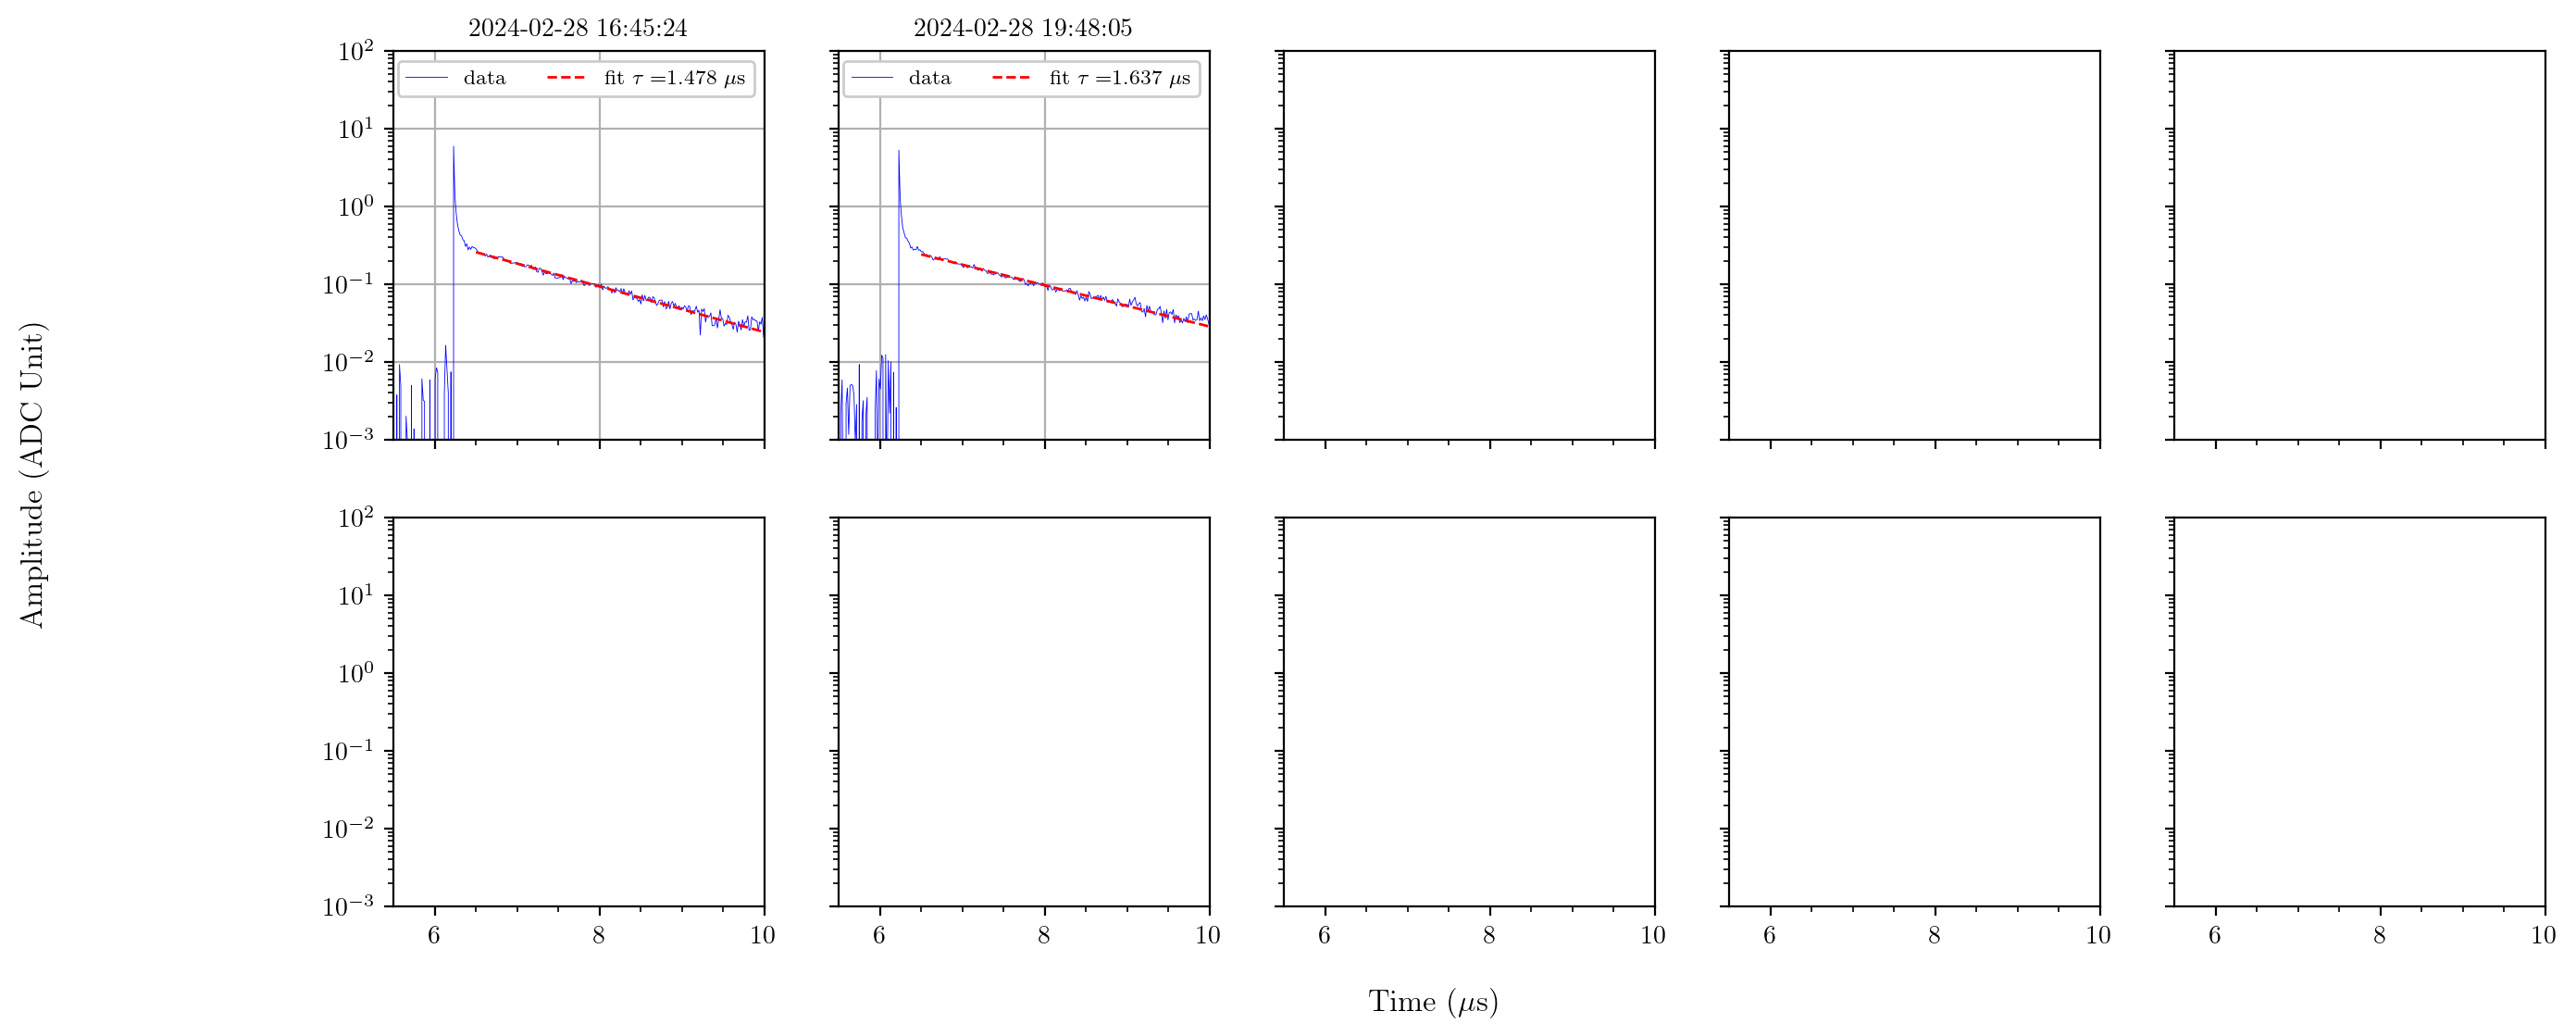

In [22]:
# Make plots for all datasets
# Fitted SPE average waveform
nrows = 2
fig, axs = plt.subplots(nrows, 5, sharex=True, sharey=True)
fig.set_size_inches(15, 3*nrows)
for i, f in enumerate(files):
    if data_scint[f][-1]['sum_wf'].shape[0]>0:
        axs[i//5, i%5].plot(
            data_scint[f][-1]['time_sub'],
            data_scint[f][-1]['sum_wf_sub'],
            label=f'data', color='b', linewidth=0.3)
        # axs[i//5, i%5].plot(
        #     data_scint[f][-1]['time_sub'],
        #     template2(data_scint[f][-1]['time_sub'], *data_scint[f][-1]['pars']),
        #     label=r'fit $\tau=${:.3f} $\mu $s'.format(data_scint[f][-1]['pars'][3]), color='r', linestyle='--', linewidth=1)
        mask = (data_scint[f][-1]['time_sub']>data_scint[f][-1]['fit_range'][0]) & (data_scint[f][-1]['time_sub']<data_scint[f][-1]['fit_range'][1])
        axs[i//5, i%5].plot(
            data_scint[f][-1]['time_sub'][mask],
            template3(data_scint[f][-1]['time_sub'][mask], *data_scint[f][-1]['pars']),
            label=r'fit $\tau=${:.3f} $\mu $s'.format(data_scint[f][-1]['pars'][1]), color='r', linestyle='--', linewidth=1)
        axs[i//5, i%5].legend(loc='upper right',ncol=2)
        axs[i//5, i%5].set_xlim(5.5, 10)
        axs[i//5, i%5].set_ylim(1e-3, 1e2)
        axs[i//5, i%5].set_yscale('log')
        axs[i//5, i%5].minorticks_on()
        axs[i//5, i%5].grid()
        axs[i//5, i%5].set_title(f'{date_time[f]}')
fig.supxlabel(r'Time ($\mu$s)', y=0.01)
fig.supylabel(r'Amplitude (ADC Unit)', x=-0.01)

# Triplet lifetime evolution

Get folder paths and days since the getter was turned on

In [32]:
# dt_getter = datetime(2024,2,14,15,0,0)
# print('The getter was turned on at', dt_getter)
dt_getter = datetime(2024,2,28,16,33,0)
print('Xenon injected at', dt_getter)

Xenon injected at 2024-02-28 16:33:00


In [33]:
files_all = files

In [34]:
# Sort datasets
S_PER_DAY = 86400
directory = '/scratch/gpfs/as111/results/'
datetime_files = {}
for f in files_all:
    df = pd.read_hdf(f, key=f'98/-1')
    date_time = datetime(*np.array(df['start_datetime']).astype(int))
    days = (date_time-dt_getter).total_seconds()/S_PER_DAY
    datetime_files[days] = f
sorted_keys = list(datetime_files.keys())
sorted_keys.sort()

In [35]:
data_triplet = []
channels = np.arange(8)
nsub = 4
for sorted_day in sorted_keys:
    file = datetime_files[sorted_day]
    # Create a new dataset if >30mins apart from the last one
    if len(data_triplet)==0 or sorted_day-data_triplet[-1]['days']>1/48: 
        data_triplet.append({
            'days': sorted_day, 
            'filename': [file], 
            'data':{}
        })
        for ch in channels:
            data_triplet[-1]['data'][ch] = {'n_scint_wfs':0, 'avg_scint_wf':np.zeros(0), 'time':np.zeros(0)}
    else:
        data_triplet[-1]['filename'].append(file)
# Load data    
for d in data_triplet:
    for ch in channels:
        for f in d['filename']:
            df = pd.read_hdf(f, key=f'98/{ch}')
            d['data'][ch]['n_scint_wfs'] += np.array(df['n_scint_wfs'])[0]
            if d['data'][ch]['time'].shape[0]==0:
                d['data'][ch]['time'] = np.array(df['time'].dropna())
            if d['data'][ch]['avg_scint_wf'].shape[0]==0:
                d['data'][ch]['avg_scint_wf'] = np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
            else:
                d['data'][ch]['avg_scint_wf'] += np.array(df['avg_scint_wf'].dropna())*np.array(df['n_scint_wfs'])[0]
            df = None # Clear memory
        d['data'][ch]['avg_scint_wf'] /= d['data'][ch]['n_scint_wfs']
        # Deconvolution
        dt = data_spe[ch]['time'][1]-data_spe[ch]['time'][0]
        shift = np.array([np.exp(complex(0,-2*np.pi*freq*dt*int(data_spe[ch]['pars'][3]/dt))) for freq in data_spe[ch]['frequency']])
        d['data'][ch]['deconv'] = ifft(fft(d['data'][ch]['avg_scint_wf'])/data_spe[ch]['fft_spe_wf']*shift).real
    # Summation
    d['data'][-1] = {'time': d['data'][0]['time'], 'sum_wf': np.zeros(d['data'][0]['time'].shape[0])}
    for ch in channels:
        d['data'][-1]['sum_wf'] += d['data'][ch]['deconv']
    d['data'][-1]['time_sub'],d['data'][-1]['sum_wf_sub'] = subsample(d['data'][-1]['time'],d['data'][-1]['sum_wf'],nsub)
    # Fitting
    pretrg = 5 #us
    # fit_range = [6.2,10] #us
    fit_range = [6.5,10] #us
    err = np.std(d['data'][-1]['sum_wf_sub'][d['data'][-1]['time_sub']<pretrg])
    range_arr = (d['data'][-1]['time_sub']<fit_range[1])&(d['data'][-1]['time_sub']>fit_range[0])
    # popt,pcov = curve_fit(
    #     template2,
    #     d['data'][-1]['time_sub'][range_arr], 
    #     d['data'][-1]['sum_wf_sub'][range_arr], 
    #     p0=[5, 0.02, 0.5, 0.8, 0.003, 6.23], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    popt,pcov = curve_fit(
        template3,
        d['data'][-1]['time_sub'][range_arr], 
        d['data'][-1]['sum_wf_sub'][range_arr], 
        p0=[100,1], sigma=err*np.ones(np.sum(range_arr)), maxfev=100000)
    d['data'][-1]['pars'] = popt
    d['data'][-1]['cov'] = pcov
    d['data'][-1]['fit_range'] = fit_range
    # print(f'{d["days"]*24:.2f} hours As={popt[0]:.3f} Ts={popt[1]:.5f}us At={popt[2]:.5f} Tt={popt[3]:.3f}us sigma={popt[4]:.5f}us t0={popt[5]:.4f}us')
    print(f'{d["days"]*24:.2f} hours A={popt[0]:.3f} tau={popt[1]:.5f}us')

0.21 hours A=18.300 tau=1.48687us
3.25 hours A=11.417 tau=1.64360us


In [36]:
# Fit result container
# Initialize
triplet_fit = {}

In [37]:
# triplet_fit = {}
# triplet_fit['days'] = np.array([d['days'] for d in data_triplet])
# triplet_fit['a1'] = np.array([d['data'][-1]['pars'][0] for d in data_triplet])
# triplet_fit['tau1'] = np.array([d['data'][-1]['pars'][1] for d in data_triplet])
# triplet_fit['a2'] = np.array([d['data'][-1]['pars'][2] for d in data_triplet])
# triplet_fit['tau2'] = np.array([d['data'][-1]['pars'][3] for d in data_triplet])
# triplet_fit['a1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][0, 0]) for d in data_triplet])
# triplet_fit['tau1err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][1, 1]) for d in data_triplet])
# triplet_fit['a2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][2, 2]) for d in data_triplet])
# triplet_fit['tau2err'] = np.array([func.error_distance(df=6, sigma=1)*np.sqrt(d['data'][-1]['cov'][3, 3]) for d in data_triplet])
triplet_fit = {}
triplet_fit['days'] = np.array([d['days'] for d in data_triplet])
triplet_fit['a'] = np.array([d['data'][-1]['pars'][0] for d in data_triplet])
triplet_fit['tau'] = np.array([d['data'][-1]['pars'][1] for d in data_triplet])
triplet_fit['a_err'] = np.array([func.error_distance(df=2, sigma=1)*np.sqrt(d['data'][-1]['cov'][0, 0]) for d in data_triplet])
triplet_fit['tau_err'] = np.array([func.error_distance(df=2, sigma=1)*np.sqrt(d['data'][-1]['cov'][1, 1]) for d in data_triplet])

In [38]:
print(triplet_fit['tau'])

[1.48686597 1.64359654]


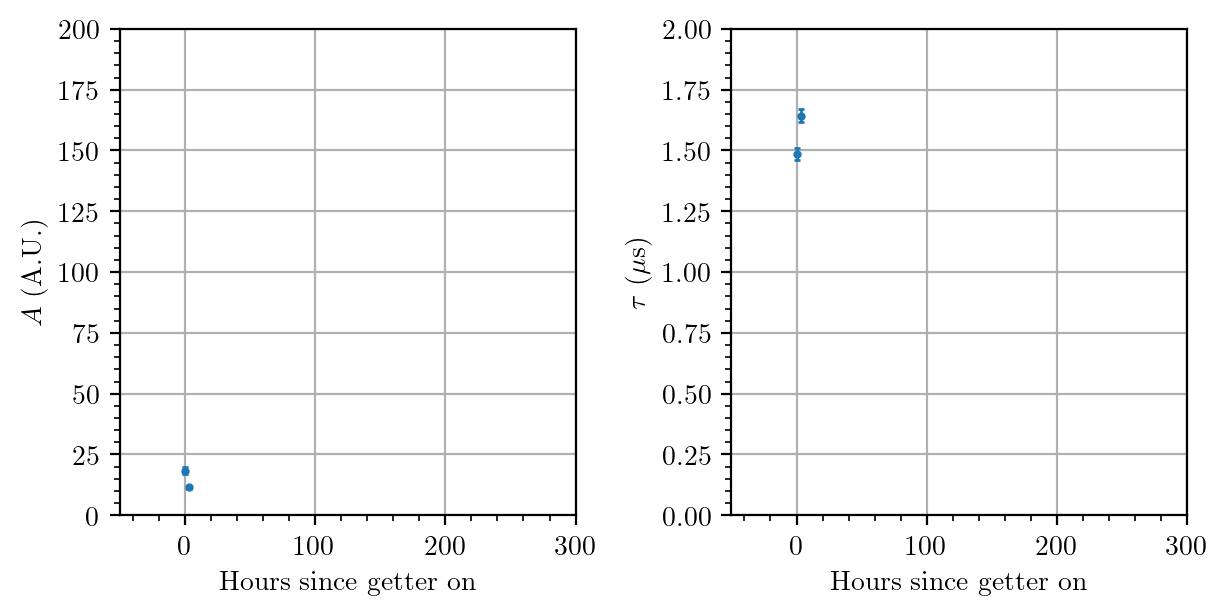

In [39]:
# Make plots for all parameters
# Triplet evolution
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.set_size_inches(6, 3)
fig.tight_layout(h_pad=3, w_pad=3)
axs[0].errorbar(
    triplet_fit['days']*24,
    triplet_fit['a'],
    yerr=triplet_fit['a_err'],
    label=f'98V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[0].set_ylabel(r'$A$ (A.U.)')
axs[0].set_ylim(0,200)

axs[1].errorbar(
    triplet_fit['days']*24,
    triplet_fit['tau'],
    yerr=triplet_fit['tau_err'],
    label=f'98V', linestyle='', linewidth=1, fmt='o', markersize=2, capsize=1)
axs[1].set_ylabel(r'$\tau$ ($\mu$s)')
axs[1].set_ylim(0,2)

for i in range(2):
    axs[i].minorticks_on()
    axs[i].grid()
    axs[i].set_xlim(-50,300)
    axs[i].set_xlabel('Hours since getter on')